#### Barometrische Höhenformel
##### Exponentiell abfallender Luftdruck als Funktion der Höhe h

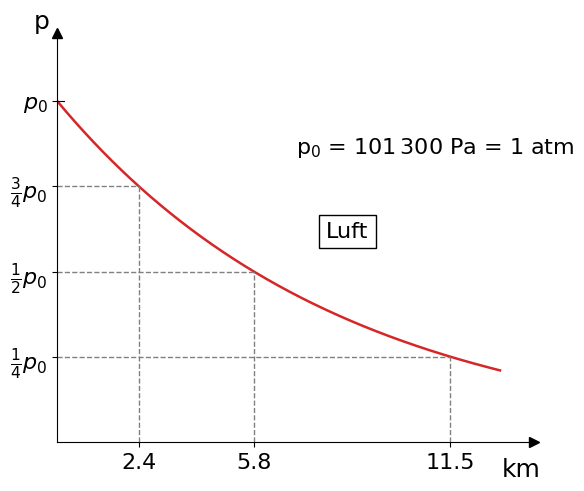

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Einstellungen
x_max = 14  # Maximale x-Achse in km
y_max = 1.2  # Maximale y-Achse (normalisierter Druck)
lw_gray = 1.0  # Linienbreite für graue Hilfslinien
fs_ticklabels = 16  # Schriftgröße für Achsenbeschriftungen
fs_insert = 16  # Schriftgröße für eingefügte Boxen
fs_axislabels = 18  # Schriftgröße für Achsenlabels

# 1. Daten generieren
# Wir plotten von 0 bis 13 km
h = np.linspace(0, 13, 500)

# Normalisierter Druck (p0 = 1)
# Die Formel basiert auf der Beobachtung im Bild: 
# Bei 5.5 km ist p = 0.5 * p0. Das bedeutet p(h) = p0 * (0.5)^(h/5.5)

g = 9.81  # Erdbeschleunigung in m/s^2
rho0 = 1.24  # Dichte der Luft auf Meereshöhe in kg/m^3
p0 = 101300  # Luftdruck auf Meereshöhe in Pa
H = p0/(rho0*g) / 1000  # Skalenhöhe in km

# Normalisierter Druck
p_norm = 1.0 * np.exp(-h / H)

h_0p75 = H * np.log(4/3)  # Höhe für p = 0.75 * p0
h_0p5 = H * np.log(2)  # Höhe für p = 0.5 * p0
h_0p25 = H * np.log(4)  # Höhe für p = 0.25 * p0
p_norm_0p75 = 0.75
p_norm_0p5 = 0.5
p_norm_0p25 = 0.25

# 2. Plot einrichten
fig, ax = plt.subplots(figsize=(6, 5))

# Rote Kurve plotten
ax.plot(h, p_norm, color='#d62728', linewidth=1.8)

# 3. Hilfslinien (gestrichelt)
# Set für 5.77 km (1/2 p0)
ax.hlines(y=p_norm_0p5, xmin=0, xmax=h_0p5, colors='gray', linestyles='--', linewidth=lw_gray)
ax.vlines(x=h_0p5, ymin=0, ymax=p_norm_0p5, colors='gray', linestyles='--', linewidth=lw_gray)
# Set für 11.54 km (1/4 p0)
ax.hlines(y=p_norm_0p25, xmin=0, xmax=h_0p25, colors='gray', linestyles='--', linewidth=lw_gray)
ax.vlines(x=h_0p25, ymin=0, ymax=p_norm_0p25, colors='gray', linestyles='--', linewidth=lw_gray)
# Set für 3.15 km (3/4 p0)
ax.hlines(y=p_norm_0p75, xmin=0, xmax=h_0p75, colors='gray', linestyles='--', linewidth=lw_gray)
ax.vlines(x=h_0p75, ymin=0, ymax=p_norm_0p75, colors='gray', linestyles='--', linewidth=lw_gray)

# 4. Achsen formatieren (Spines anpassen für Pfeil-Optik)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Achsen-Limits setzen
ax.set_xlim(0, x_max)
ax.set_ylim(0, y_max)

# Pfeilspitzen an die Achsenenden fügen
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False, markersize=7)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False, markersize=7)

# 5. Beschriftungen (Ticks und Labels)

# X-Achse
ax.set_xticks([h_0p75, h_0p5, h_0p25])
ax.set_xticklabels([str(round(h_0p75, 1)), str(round(h_0p5, 1)), str(round(h_0p25, 1))], fontsize=fs_ticklabels)
ax.text(14.2, -0.1, 'km', fontsize=fs_axislabels, ha='right') # Einheit km

# Y-Achse
ax.set_yticks([1.0, 0.75, 0.5, 0.25])
ax.set_yticklabels(['$p_0$', r'$\frac{3}{4} p_0$', r'$\frac{1}{2} p_0$', r'$\frac{1}{4} p_0$'], fontsize=fs_ticklabels)
ax.text(-0.7, 1.2, 'p', fontsize=fs_axislabels, va='bottom') # Label p

# Kleiner Strich oben bei p0 (da die Achse weitergeht, aber der Wert dort ist)
ax.plot([0, 0.2], [1, 1], color='black', linewidth=0.8) 

# 6. Text-Annotationen

# Text: p0 = 1013 hPa...
text_str = r"p$_0$ = $101\,300$ Pa = 1 atm"
ax.text(7, 0.9, text_str, fontsize=fs_insert, va='top')

# Box mit "Luft"
ax.text(7.9, 0.6, "Luft", fontsize=fs_insert, 
        bbox=dict(facecolor='white', edgecolor='black', pad=5))

# Titel oder Layout-Anpassung
plt.tight_layout()

# Anzeigen
# plt.show()

# bbox_inches='tight' schneidet überschüssigen weißen Rand weg
output_folder = 'C:/Users/alexsc31/Documents_privat/FH Campus/Clinical_Engineering/GithubRepo/Skriptum_Grundlagen_Physik_FH-Campus/Bilder/Kapitel_Waermelehre/'
plt.savefig(output_folder + 'hoehenformel.pdf', bbox_inches='tight')

#### 3D Particles in a box
##### Explanation

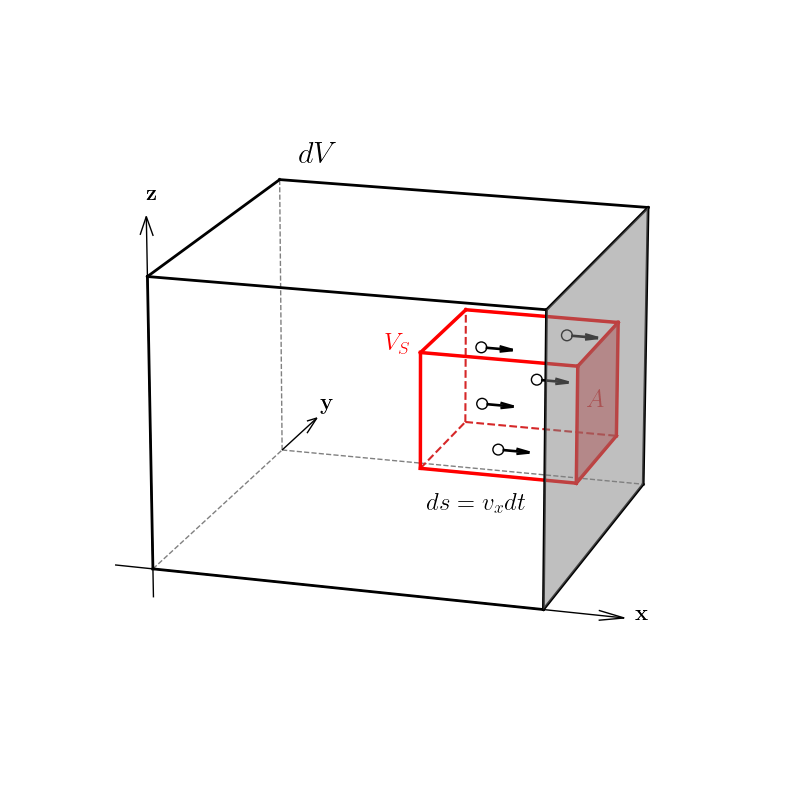

In [5]:
from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# matplotlib.rcParams['mathtext.fontset'] = 'custom'
# matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

%matplotlib inline
# %matplotlib qt5

def draw_box_wireframe(ax, p0, p1, color_dashed='k', ls_dashed='-', lw_dashed=1, zorder_dashed=0,
                       color_thick='black', ls_thick='-', lw_thick=2, zorder_thick=1):
    """
    Hilfsfunktion zum Zeichnen eines Drahtgitter-Quaders.
    p0: Tupel (x,y,z) der unteren linken vorderen Ecke
    p1: Tupel (x,y,z) der oberen rechten hinteren Ecke
    """
    x0, y0, z0 = p0
    x1, y1, z1 = p1
    
    # Die 12 Kanten des Quaders definieren
    edges = [
        [[x0, y0, z0], [x1, y0, z0]], [[x0, y1, z0], [x1, y1, z0]],
        [[x0, y0, z1], [x1, y0, z1]], [[x0, y1, z1], [x1, y1, z1]], # parallele x-Kanten
        [[x0, y0, z0], [x0, y1, z0]], [[x1, y0, z0], [x1, y1, z0]],
        [[x0, y0, z1], [x0, y1, z1]], [[x1, y0, z1], [x1, y1, z1]], # parallele y-Kanten
        [[x0, y0, z0], [x0, y0, z1]], [[x1, y0, z0], [x1, y0, z1]],
        [[x0, y1, z0], [x0, y1, z1]], [[x1, y1, z0], [x1, y1, z1]]  # parallele z-Kanten
    ]
    
    for edge in edges:
        ax.plot3D(*zip(*edge), color=color_dashed, linestyle=ls_dashed, linewidth=lw_dashed, zorder=zorder_dashed)

    # Wir zeichnen die vorderen Linien nochmal durchgezogen für den 3D Effekt im Originalbild
    ax.plot([x0, x1], [y0, y0], [z0, z0], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x0,y0,z0) to (x1,y0,z0)
    ax.plot([x0, x0], [y0, y0], [z0, z1], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x0,y0,z0) to (x0,y0,z1)
    ax.plot([x1, x1], [y0, y1], [z0, z0], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x1,y0,z0) to (x1,y1,z0)
    ax.plot([x1, x1], [y0, y0], [z0, z1], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x1,y0,z0) to (x1,y0,z1)
    ax.plot([x0, x1], [y0, y0], [z1, z1], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x0,y0,z1) to (x1,y0,z1)
    ax.plot([x1, x1], [y1, y1], [z0, z1], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x1,y1,z0) to (x1,y1,z1)
    ax.plot([x0, x0], [y0, y1], [z1, z1], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x0,y0,z1) to (x0,y1,z1)
    ax.plot([x1, x1], [y0, y1], [z1, z1], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x1,y0,z1) to (x1,y1,z1)
    ax.plot([x0, x1], [y1, y1], [z1, z1], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x0,y1,z1) to (x1,y1,z1)

# --- --------------------- ---
# --- Hauptprogramm ---
fig = plt.figure(num=34, figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

lw_black_cube = 2.0  # Linienbreite für die schwarze Box

# 1. Definition der Dimensionen
# Großes Volumen dV (schwarz)
L = 10
dV_start = (0, 0, 0)
dV_end = (L, L, L)

# Kleines Volumen Vs (rot)
# Wir platzieren es mittig. ds entspricht der Länge in x-Richtung.
len_Vs = 4
x_start_s, x_end_s = L-len_Vs, L
y_start_s, y_end_s = 3, 3+len_Vs
z_start_s, z_end_s = 3, 3+len_Vs
Vs_start = (x_start_s, y_start_s, z_start_s)
Vs_end = (x_end_s, y_end_s, z_end_s)

# 2. Zeichnen der Drahtgitter-Boxen
# Großes dV (schwarz, dünn, leicht transparent für die hinteren Linien)
draw_box_wireframe(ax, dV_start, dV_end, 
                   color_dashed='gray', ls_dashed='--', lw_dashed=1, zorder_dashed=0,
                   color_thick='black', ls_thick='-', lw_thick=lw_black_cube, zorder_thick=5)

# Kleines Vs (rot, durchgezogen)
draw_box_wireframe(ax, Vs_start, Vs_end, 
                   color_dashed='tab:red', ls_dashed='--', lw_dashed=1.5, zorder_dashed=1,
                   color_thick='red', ls_thick='-', lw_thick=2.5, zorder_thick=4)

# Die recht Wand der Box dV soll bemalt werden 
verts_V_rechts = [
    [L, 0, 0],
    [L, L, 0],
    [L, L, L],
    [L, 0, L]
]

# 3. Fläche A füllen (die rechte Seite der roten Box)
# Eckpunkte der Fläche A definieren
verts_A = [
    [x_end_s, y_start_s, z_start_s],
    [x_end_s, y_end_s, z_start_s],
    [x_end_s, y_end_s, z_end_s],
    [x_end_s, y_start_s, z_end_s]
]
# Polygon erstellen und hinzufügen
face_A = Poly3DCollection([verts_A], alpha=0.5, facecolor='tab:red')
ax.add_collection3d(face_A)
face_V_rechts = Poly3DCollection([verts_V_rechts], alpha=0.5, facecolor='gray')
ax.add_collection3d(face_V_rechts)
# 4. Teilchen und Geschwindigkeitsvektoren
# Manuelle Auswahl von 4 repräsentativen Punkten innerhalb von Vs
ds = 0.11  # kleiner Versatz, damit die Pfeile am Rande der Teilchen liegen
particles_pos = np.array([
    [x_start_s + 1.3, y_start_s + 1, z_start_s + 2],
    [x_start_s + 2.7, y_end_s - 3, z_start_s + 3],
    [x_start_s + 2.8, y_start_s + 3.5, z_end_s - 0.4],
    [x_start_s + 1.5, y_end_s - 2.2, z_start_s + 0.1 ],
    [x_start_s + 1.1, y_start_s + 1.6, z_end_s - 0.3 ]
])

# Vektoren (zeigen alle in positive x-Richtung)
U = np.ones(len(particles_pos)) * 2 # Länge der Pfeile
V = np.zeros(len(particles_pos))
W = np.zeros(len(particles_pos))

# Teilchen als Kreise zeichnen
ax.scatter(particles_pos[:, 0], particles_pos[:, 1], particles_pos[:, 2], 
           color='white', edgecolor='black', alpha=1.0, s=60, zorder=2)

# Pfeile zeichnen (quiver)
ax.quiver(particles_pos[:, 0]+ds, particles_pos[:, 1], particles_pos[:, 2], 
          U, V, W, color='black', length=0.35, arrow_length_ratio=0.5, lw=1.9, zorder=0)


# 5. Achsen und Beschriftungen
# Wir verstecken die Standard-Achsen und zeichnen eigene
ax.set_axis_off()

# Achsenpfeile manuell zeichnen (Startpunkt leicht außerhalb des Ursprungs)
dax = 3
ax_len = L + dax
ax.quiver(-1, 0, 0, ax_len, 0, 0, color='k', arrow_length_ratio=0.05, lw=1) # x
ax.quiver(0, L, 0, 0, dax, 0, color='k', arrow_length_ratio=0.30, lw=1) # y
ax.quiver(0, 0, -1, 0, 0, ax_len, color='k', arrow_length_ratio=0.05, lw=1) # z

# Achsenbeschriftungen
fs_ax = 16
ax.text(L+2.6, 0, 0, r'$\mathbf{x}$', fontsize=fs_ax, ha='right')
ax.text(0, L+3.3, 0, r'$\mathbf{y}$', fontsize=fs_ax, va='bottom')
ax.text(0, 0, L+2.4, r'$\mathbf{z}$', fontsize=fs_ax, va='bottom')

# Diagramm-Beschriftungen
ax.text(1, L, L+0.7, '$dV$', fontsize=22, ha='center', style='italic')
ax.text(x_start_s-0.6, y_start_s, z_end_s, '$V_S$', fontsize=18, color='red', ha='center', style='italic')
ax.text(x_end_s-0.3, y_start_s + (y_end_s-y_start_s)/2, z_start_s + (z_end_s-z_start_s)/2, '$A$', 
        fontsize=18, ha='left', va='center', color='tab:red')

# Beschriftung für ds = vx * dt als 2D-Overlay mit Rotation
ax.text(x_start_s + (x_end_s-x_start_s)/2, y_start_s-2, z_start_s-0.3, '$ds = v_x dt$', 
        fontsize=18, ha='center')


# 6. Ansichtseinstellungen
# Limits setzen, damit alles zentriert ist
ax_lim = 1
ax.set_xlim(-ax_lim, L+ax_lim)
ax.set_ylim(-ax_lim, L+ax_lim)
ax.set_zlim(-ax_lim, L+ax_lim)

# Kamerawinkel einstellen, um der Vorlage zu entsprechen
ax.view_init(elev=17, azim=-73)

plt.tight_layout()
# plt.show()

output_folder = 'C:/Users/alexsc31/Documents_privat/FH Campus/Clinical_Engineering/GithubRepo/Skriptum_Grundlagen_Physik_FH-Campus/Bilder/Kapitel_Waermelehre/'
plt.savefig(output_folder + 'particles_in_box.pdf', bbox_inches='tight')


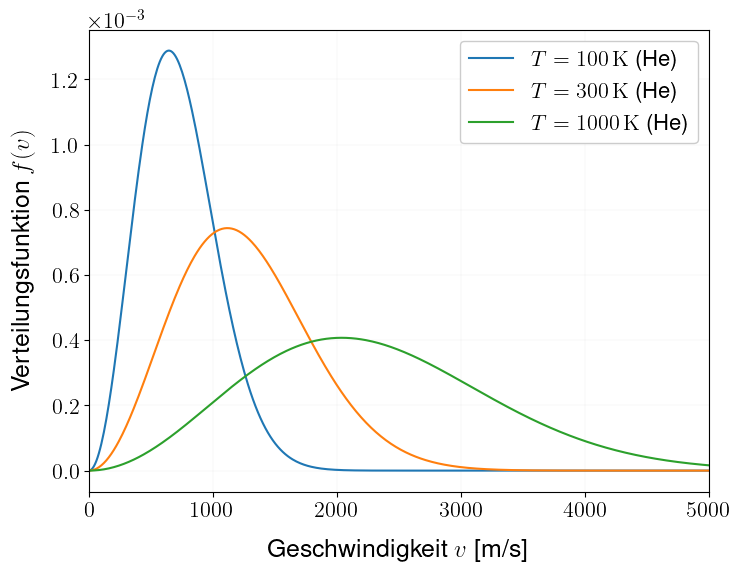

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

u = 1.660539066e-27
mHe = 4.002602*u
mH = 1.00784602*u

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

fs_axislabels = 18
fs_ticklabels = 16
fs_legendlabels=16


# Define the Maxwell-Boltzmann distribution function
def maxwell_boltzmann(m, T, v):
    k = 1.38e-23  # Boltzmann constant
    return (m / (2 * np.pi * k * T))**(3/2) * 4 * np.pi * v**2 * np.exp(-(m * v**2) / (2 * k * T))

def vW(m, T):
    k = 1.38e-23  # Boltzmann constant
    return np.sqrt(2*k*T/m)

def vBar(m,T):
    return 2*vW(m,T)/np.sqrt(np.pi)

def vSquaredBar(m,T):
    return (3/2)*(vW(m,T)**2)


# Define velocity range
v = np.linspace(0, 5000, 500)

# Calculate distributions for different temperatures
T_values = [100, 300, 1000]
distributions_He = [maxwell_boltzmann(mHe, T, v) for T in T_values]
colors = ['tab:blue','tab:orange','tab:green']
# Plot the distributions
plt.figure(figsize=(8, 6))
for T, dist, color in zip(T_values, distributions_He, colors):
    plt.plot(v, dist, label=rf"$T = {T} \, \mathrm{{K}}$ (He)", linestyle='-')

# Add lines for vW, vBar, and vSquaredBar
alpha_lines = 0.7
for T, color in zip(T_values, colors):
    vw = vW(mHe, T)
    vbar = vBar(mHe, T)
    vsquaredbar = np.sqrt(vSquaredBar(mHe, T))
    # plt.axvline(vw, color=color, linestyle='-', alpha=alpha_lines)
    # plt.axvline(vbar, color=color, linestyle='--', alpha=alpha_lines)
    # plt.axvline(vsquaredbar, color=color, linestyle='-.', alpha=alpha_lines)

# plt.axvline(-vw, linestyle='-', color='black', alpha=alpha_lines, label=f"$v_W$")
# plt.axvline(-vbar, linestyle='--', color='black',alpha=alpha_lines, label=r"$\widebar{v}$")
# plt.axvline(-vsquaredbar, linestyle='-.', color='black', alpha=alpha_lines, label=r"$\sqrt{\widebar{v^2}}$")
# set the exponent on the y-axis to scientific notation
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
# set the fontsize of the exponent
plt.gca().yaxis.get_offset_text().set_fontsize(fs_ticklabels)
# set the tick label fontsize 
plt.xticks(fontsize=fs_ticklabels)
plt.yticks(fontsize=fs_ticklabels)


# plt.title("Maxwell-Boltzmann Verteilung", fontsize=16)
plt.xlim([0, 5000])
plt.xlabel(r"Geschwindigkeit $v$ [m/s]", fontsize=fs_axislabels)
plt.ylabel(r"Verteilungsfunktion $f(v)$", fontsize=fs_axislabels)

# Increase the offset between the axis label and the tick labels
plt.gca().xaxis.labelpad = 12
plt.gca().yaxis.labelpad = 12

# set the legend background to white with alpha 0.8
legend = plt.legend(fontsize=fs_legendlabels, loc='upper right')
legend.get_frame().set_alpha(1.0)

plt.grid(color='gray', linestyle='-', linewidth=0.1, alpha=0.4)


# plt.show()

output_folder = 'C:/Users/alexsc31/Documents_privat/FH Campus/Clinical_Engineering/GithubRepo/Skriptum_Grundlagen_Physik_FH-Campus/Bilder/Kapitel_Waermelehre/'
plt.savefig(output_folder + 'maxwell-boltzmann_He_T100-1000K.pdf', bbox_inches='tight')


#### Spezielle Zustandsänderungen
##### ideales Gas

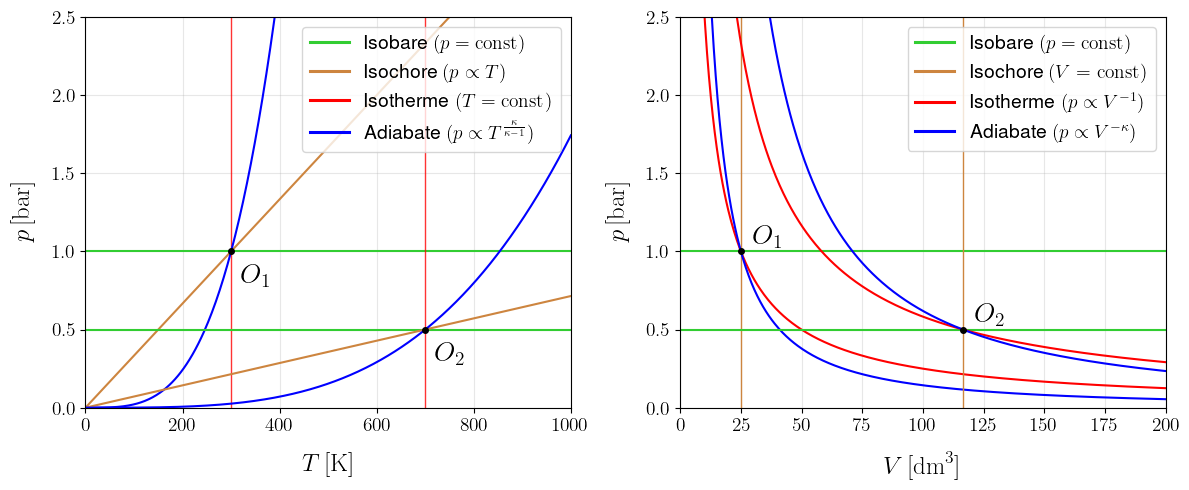

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.lines import Line2D


rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

fs_axislabels = 18
fs_ticklabels = 14
fs_legend = 14
lw_legend = 2.2

# --- Physikalische Parameter ---
# Adiabatenexponent (kappa/gamma), z.B. 1.4 für zweiatomige Gase (Luft)
kappa = 1.4 
# Gaskonstante und Stoffmenge sind hier als Proportionalitätsfaktor zusammengefasst.
nu = 1.0  # Stoffmenge in mol
R = 0.08314  # Gaskonstante in bar*dm^3/(mol*K)

# --- Definition der Zustandspunkte O1 und O2 ---
# O1 aus Diagramm abgelesen: T=300 K, p=1.0 bar, V=24.9dm^3
v1 = nu*R*300/1.0
state_1 = {'T': 300.0, 'p': 1.0, 'V': v1}
# O2 aus Diagramm abgelesen: T=700, p=0.5, V=116.4dm^3
v2 = nu*R*700/0.5
state_2 = {'T': 700.0, 'p': 0.5, 'V': v2}

states = [state_1, state_2]
labels = ['$O_1$', '$O_2$']

# --- Funktionen für die Kurven ---

def get_isochor_p_from_T(T, p0, T0):
    # p/T = const -> p = p0 * (T/T0)
    return p0 * (T / T0)

def get_adiabat_p_from_T(T, p0, T0, k):
    # T * p^((1-k)/k) = const  -> p proportional T^(k/(k-1))
    # Exponent für Luft ca 1.4 / 0.4 = 3.5
    exponent = k / (k - 1)
    return p0 * (T / T0)**exponent

def get_isotherm_p_from_V(V, p0, V0):
    # p*V = const -> p = p0 * V0 / V
    return p0 * V0 / V

def get_adiabat_p_from_V(V, p0, V0, k):
    # p*V^k = const -> p = p0 * (V0/V)^k
    return p0 * (V0 / V)**k

# --- Plotting Setup ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bereiche für die Achsen
T_range = np.linspace(0, 1000, 500)
V_range = np.linspace(1, 200, 500) # Start bei 1 um div/0 zu vermeiden

# Farben (angepasst an die Vorlage)
col_isobar = 'limegreen' # Grün
col_isochor = 'peru'     # Braun
col_isotherm = 'red'     # Rot
col_adiabat = 'blue'     # Blau

# ==========================================
# DIAGRAMM 1: p-T Diagramm (links)
# ==========================================
ax1.set_xlabel(r'$T\, [\mathrm{K}]$', fontsize=fs_axislabels)
ax1.set_ylabel(r'$p\, [\mathrm{bar}]$', fontsize=fs_axislabels)
# Increase the offset between the axis label and the tick labels
ax1.xaxis.labelpad = 12
ax1.yaxis.labelpad = 12

ax1.set_xlim(0, 1000)
ax1.set_ylim(0, 2.5)
ax1.grid(True, alpha=0.3)

for state, label in zip(states, labels):
    T0, p0 = state['T'], state['p']
    
    # 1. Isobare (p = const) - Horizontale Grüne Linie
    ax1.hlines(p0, 0, 1000, colors=col_isobar, linewidth=1.5)
    
    # 2. Isotherme (T = const) - Vertikale Rote Linie
    ax1.vlines(T0, 0, 2.5, colors=col_isotherm, linewidth=1, alpha=0.8) 
    # Hinweis: Im p-T Bild ist die Isotherme die vertikale Linie. 
    # Im Originalbild sieht man rot kaum, aber Isothermen sind vertikal im p-T.
    
    # 3. Isochore (p ~ T) - Braune Gerade durch Ursprung
    p_isochor = get_isochor_p_from_T(T_range, p0, T0)
    ax1.plot(T_range, p_isochor, color=col_isochor)
    
    # 4. Adiabate (p ~ T^(k/k-1)) - Blaue Kurve
    p_adiabat = get_adiabat_p_from_T(T_range, p0, T0, kappa)
    ax1.plot(T_range, p_adiabat, color=col_adiabat)
    
    # Punkt und Label
    ax1.plot(T0, p0, 'ko', markersize=4) # Schwarzer Punkt
    ax1.text(T0 + 20, p0 - 0.2, label, fontsize=20)

# set the tick label fontsize 
ax1.tick_params(axis='x', labelsize=fs_ticklabels)
ax1.tick_params(axis='y', labelsize=fs_ticklabels)

# Legende für die Linienarten
legend_elements = [
    Line2D([0], [0], color=col_isobar, lw=lw_legend, label=r'Isobare $(p = \mathrm{const})$'),
    Line2D([0], [0], color=col_isochor, lw=lw_legend, label=r'Isochore $(p \propto T)$'),
    Line2D([0], [0], color=col_isotherm, lw=lw_legend, label=r'Isotherme $(T = \mathrm{const})$'),
    Line2D([0], [0], color=col_adiabat, lw=lw_legend, label=r'Adiabate $(p \propto T^{\frac{\kappa}{\kappa - 1}})$')
]
ax1.legend(handles=legend_elements, fontsize=fs_legend, loc='upper right')

# ==========================================
# DIAGRAMM 2: p-V Diagramm (rechts)
# ==========================================
ax2.set_xlabel(r'$V\, [\mathrm{dm}^3]$', fontsize=fs_axislabels)
ax2.set_ylabel(r'$p\, [\mathrm{bar}]$', fontsize=fs_axislabels)
ax2.set_xlim(0, 200)
ax2.set_ylim(0, 2.5)
# Increase the offset between the axis label and the tick labels
ax2.xaxis.labelpad = 12
ax2.yaxis.labelpad = 12

ax2.grid(True, alpha=0.3)

for state, label in zip(states, labels):
    V0, p0 = state['V'], state['p']
    
    # 1. Isobare (p = const) - Horizontale Grüne Linie
    ax2.hlines(p0, 0, 200, colors=col_isobar, linewidth=1.5)
    
    # 2. Isochore (V = const) - Vertikale Braune Linie
    ax2.vlines(V0, 0, 2.5, colors=col_isochor, linewidth=1)
    
    # 3. Isotherme (p ~ 1/V) - Rote Hyperbel
    p_isotherm = get_isotherm_p_from_V(V_range, p0, V0)
    ax2.plot(V_range, p_isotherm, color=col_isotherm)
    
    # 4. Adiabate (p ~ 1/V^k) - Blaue steilere Kurve
    p_adiabat = get_adiabat_p_from_V(V_range, p0, V0, kappa)
    ax2.plot(V_range, p_adiabat, color=col_adiabat)
    
    # Punkt und Label
    ax2.plot(V0, p0, 'ko', markersize=4)
    ax2.text(V0 + 5, p0 + 0.05, label, fontsize=20)

ax2.tick_params(axis='x', labelsize=fs_ticklabels)
ax2.tick_params(axis='y', labelsize=fs_ticklabels)

# Legende für die Linienarten
legend_elements = [
    Line2D([0], [0], color=col_isobar, lw=lw_legend, label=r"Isobare $(p = \mathrm{const})$"),
    Line2D([0], [0], color=col_isochor, lw=lw_legend, label=r"Isochore $(V = \mathrm{const})$"),
    Line2D([0], [0], color=col_isotherm, lw=lw_legend, label=r"Isotherme $(p \propto V^{-1})$"),
    Line2D([0], [0], color=col_adiabat, lw=lw_legend, label=r"Adiabate $(p \propto V^{-\kappa})$")
]
ax2.legend(handles=legend_elements, fontsize=fs_legend, loc='upper right')


plt.tight_layout()

# plt.show()

output_folder = r'C:/Users/Alexa/Documents-Alex/FH Campus/Skriptum_Grundlagen_Physik_FH-Campus/Bilder/Kapitel_Thermodynamik/'
# output_folder = 'C:/Users/alexsc31/Documents_privat/FH Campus/Clinical_Engineering/GithubRepo/Skriptum_Grundlagen_Physik_FH-Campus/Bilder/Kapitel_Thermodynamik/'
plt.savefig(output_folder + 'isoP_isoV_isoT_isoQ_pT_and_pV.pdf', bbox_inches='tight')

#### Carnot'scher Kreisprozess
##### 

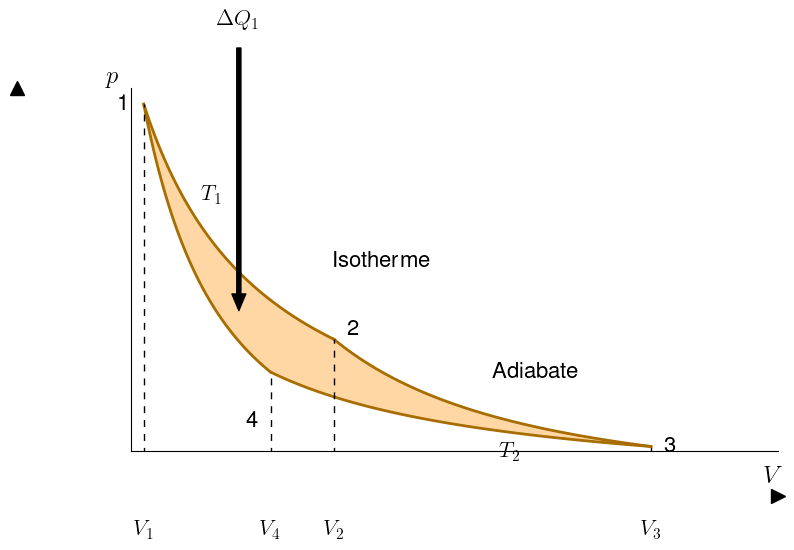

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

fs_ticklabels = 16
fs_axislabels = 18
fs_inserts = 16
fontsize_pts = 16

# --- Physikalische Parameter für einen realistischen Carnot-Zyklus ---
# Adiabatenexponent (z.B. für zweiatomiges Gas)
gamma = 1.66

# Wir definieren die Eckpunkte basierend auf physikalischen Beziehungen,
# damit die Kurven korrekt aussehen.
# V1 und p1 sind Startwerte (Zustand 1)
V1 = 1.0 # in dm^3
p1 = 15.0 # in bar

# Expansionsverhältnis für die erste Isotherme (1 -> 2)
expansion_ratio_iso = 2.5
V2 = V1 * expansion_ratio_iso
# pV = konst für Isotherme
p2 = p1 * V1 / V2

# Expansionsverhältnis für die folgende Adiabate (2 -> 3)
expansion_ratio_adia = 2.0
V3 = V2 * expansion_ratio_adia
# pV^gamma = konst für Adiabate
p3 = p2 * (V2 / V3)**gamma

# Für einen geschlossenen Carnot-Zyklus gilt die Beziehung: V2/V1 = V3/V4
# Daraus berechnen wir V4.
V4 = V3 * (V1 / V2)
# Zustand 4 liegt auf der Isotherme von 3 (T2)
p4 = p3 * V3 / V4

# --- Funktionen für die Kurven ---
def isotherm(V, p_start, V_start):
    # p = p_start * V_start / V
    return p_start * V_start / V

def adiabat(V, p_start, V_start, gamma_val):
    # p = p_start * (V_start / V)^gamma
    return p_start * (V_start / V)**gamma_val

# --- Plot Setup ---
fig, ax = plt.subplots(figsize=(8, 6))

# --- Datenpunkte für die Kurvensegmente generieren ---
# Hohe Dichte für glatte Kurven
N = 100

# 1 -> 2: Isotherme Expansion (T1)
v12 = np.linspace(V1, V2, N)
p12 = isotherm(v12, p1, V1)

# 2 -> 3: Adiabatische Expansion
v23 = np.linspace(V2, V3, N)
p23 = adiabat(v23, p2, V2, gamma)

# 3 -> 4: Isotherme Kompression (T2)
v34 = np.linspace(V3, V4, N)
p34 = isotherm(v34, p3, V3)

# 4 -> 1: Adiabatische Kompression
v41 = np.linspace(V4, V1, N)
p41 = adiabat(v41, p4, V4, gamma)

# --- Plotten der Kurven und Füllen der Fläche ---
# Fläche füllen (Farbton an das Original angepasst)
fill_color = "#FFC77E" # Ein helles Lachsrot/Orange
# Wir konkatenieren alle Punkte, um ein Polygon zu bilden
v_cycle = np.concatenate([v12, v23, v34, v41])
p_cycle = np.concatenate([p12, p23, p34, p41])
ax.fill(v_cycle, p_cycle, color=fill_color, alpha=0.7)

# Die roten Begrenzungslinien zeichnen
line_color = "#A76D00" # Ein kräftiges Rot
lw = 2
ax.plot(v12, p12, color=line_color, lw=lw)
ax.plot(v23, p23, color=line_color, lw=lw)
ax.plot(v34, p34, color=line_color, lw=lw)
ax.plot(v41, p41, color=line_color, lw=lw)


# --- Hilfslinien und Beschriftungen (Annotationen) --
# Vertikale gestrichelte Linien zu den V-Ticks
linestyle_drop = (0, (5, 5)) # Gestrichelt
color_drop = 'black'
lw_drop = 1
ax.vlines(V1, 0, p1, colors=color_drop, linestyles=linestyle_drop, lw=lw_drop)
ax.vlines(V2, 0, p2, colors=color_drop, linestyles=linestyle_drop, lw=lw_drop)
ax.vlines(V3, 0, p3, colors=color_drop, linestyles=linestyle_drop, lw=lw_drop)
ax.vlines(V4, 0, p4, colors=color_drop, linestyles=linestyle_drop, lw=lw_drop)

# Eckpunkte beschriften (1, 2, 3, 4)
offset_p = 0.5
offset_v = 0.1
ax.text(V1 - offset_v, p1, '1', fontsize=fontsize_pts, ha='right', va='center')
ax.text(V2 + offset_v, p2, '2', fontsize=fontsize_pts, ha='left', va='bottom')
ax.text(V3 + offset_v, p3, '3', fontsize=fontsize_pts, ha='left', va='center')
ax.text(V4 - offset_v, p4 - 1.5, '4', fontsize=fontsize_pts, ha='right', va='top')

# Temperaturen T1 und T2
ax.text(V1 + (V2-V1)*0.3, p12[int(N*0.3)] + 1, '$T_1$', fontsize=fs_ticklabels)
ax.text(V4 + (V3-V4)*0.6, p34[int(N*0.6)] - 1.5, '$T_2$', fontsize=fs_ticklabels)

# Kurvenbezeichnungen "Isotherme" und "Adiabate"
ax.text(V2, p12[int(N*0.8)] + 2, 'Isotherme', fontsize=fs_inserts, rotation=0)
# Positionierung der "Adiabate"-Beschriftung etwas tricky für guten Look
ax.text(V2 + (V3-V2)*0.5, p23[int(N*0.5)] + 1.5, 'Adiabate', fontsize=fs_inserts, rotation=0)


# --- Wärmepfeile (Q1 und Q2) ---
# Q1 (Wärmezufuhr oben)
arrow_x_q1 = V1 + (V2-V1)*0.5
arrow_y_start_q1 = p1
arrow_y_end_q1 = p12[int(N*0.5)] - 2
ax.annotate(r'$\Delta Q_1$', xy=(arrow_x_q1, arrow_y_end_q1), xytext=(arrow_x_q1, arrow_y_start_q1 + 3),
            arrowprops=dict(facecolor='black', shrink=0.05, width=3, headwidth=10),
            fontsize=fs_inserts, ha='center')

# Q2 (Wärmeabfuhr unten)
arrow_x_q2 = V4 + (V3-V4)*0.5
arrow_y_start_q2 = p34[int(N*0.5)]
arrow_y_end_q2 = arrow_y_start_q2 - 4
ax.annotate(r'$\Delta Q_2$', xy=(arrow_x_q2, arrow_y_end_q2), xytext=(arrow_x_q2, arrow_y_start_q2 + 1),
            arrowprops=dict(facecolor='black', shrink=0.05, width=3, headwidth=10),
            fontsize=fs_inserts, ha='center', va='bottom')


# --- Achsen-Design anpassen ---
# Standard-Ticks entfernen
ax.set_xticks([])
ax.set_yticks([])

# Eigene Achsenbeschriftungen an den Enden
# introduce a padding for the labels
padding_x = 10
padding_y = 10

ax.set_xlabel(r'$V$', fontsize=fs_axislabels, loc='right', labelpad=padding_x)
ax.set_ylabel(r'$p$', fontsize=fs_axislabels, loc='top', rotation='horizontal', labelpad=padding_y)

# Manuelle Ticks für V setzen (V1, V4, V2, V3)
ax.text(V1, -1.5, '$V_1$', fontsize=fs_ticklabels, ha='center')
ax.text(V4, -1.5, '$V_4$', fontsize=fs_ticklabels, ha='center')
ax.text(V2, -1.5, '$V_2$', fontsize=fs_ticklabels, ha='center')
ax.text(V3, -1.5, '$V_3$', fontsize=fs_ticklabels, ha='center')

# Achsenlimits setzen, damit alles gut aussieht
ax.set_xlim(V1*0.9, V3 * 1.2)
ax.set_ylim(p3*0.9, p1 * 1.04)

# Die eigentlichen Achsenlinien (Spines) anpassen, damit sie wie Pfeile aussehen
# (Standard matplotlib Achsen haben keine Pfeile am Ende)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Wir können simple Pfeile an die Enden der sichtbaren Achsen zeichnen
ax.plot(ax.get_xlim()[1], 0, ">k", markersize=10, clip_on=False)
ax.plot(0, ax.get_ylim()[1], "^k", markersize=10, clip_on=False)

plt.tight_layout()
plt.show()

In [25]:
7/5

1.4